See https://www.gapminder.org/videos/dont-panic-the-facts-about-population/

In [1]:
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
population = Table.read_table('../../data/population.csv')
population.show(3)

geo,time,population_total
abw,1800,19286
abw,1801,19286
abw,1802,19286


In [3]:
# bangladesh population in [1970, 2015]
# Alpha-3 code for Bangladesh is BGD

b_pop = population.where('geo', are.equal_to('bgd')).where('time', are.between_or_equal_to(1970, 2015)).drop('geo')
b_pop

time,population_total
1970,65048701
1971,66417450
1972,67578486
1973,68658472
1974,69837960
1975,71247153
1976,72930206
1977,74848466
1978,76948378
1979,79141947


In [4]:
life_expectancy = Table.read_table('../../data/life_expectancy.csv')
child_mortality = Table.read_table('../../data/child_mortality.csv').relabeled(2, 'child_mortality_under_5_per_1000_born')
fertility = Table.read_table('../../data/fertility.csv')

In [5]:
print(life_expectancy.row(0))
print(child_mortality.row(0))
print(fertility.row(0))

Row(geo='afg', time=1800, life_expectancy_years=28.21)
Row(geo='afg', time=1800, child_mortality_under_5_per_1000_born=468.6)
Row(geo='afg', time=1800, children_per_woman_total_fertility=7.0)


In [6]:
def fertility_over_time(country, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    return fertility.where('geo', are.equal_to(country)).where('time', are.above_or_equal_to(start)).drop(0).relabel(
        ['time', 'children_per_woman_total_fertility'], ['Year', 'Children per woman'])

In [7]:
fertility_over_time('bgd', 1970)

Year,Children per woman
1970,6.95
1971,6.94
1972,6.93
1973,6.9
1974,6.87
1975,6.82
1976,6.76
1977,6.68
1978,6.59
1979,6.48


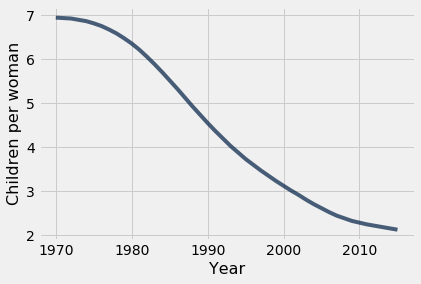

In [8]:
bangladesh_code = 'bgd'
fertility_over_time(bangladesh_code, 1970).plot(0, 1)

Year | Children per woman | Child deaths per 1000 born
1970 | 6.95               | 224.1
1971 | 6.94               | 223
1972 | 6.93               | 222
1973 | 6.9                | 220.7
1974 | 6.87               | 219.1
1975 | 6.82               | 217.1
1976 | 6.76               | 214.5
1977 | 6.68               | 211.2
1978 | 6.59               | 207.4
1979 | 6.48               | 203.3
... (36 rows omitted)


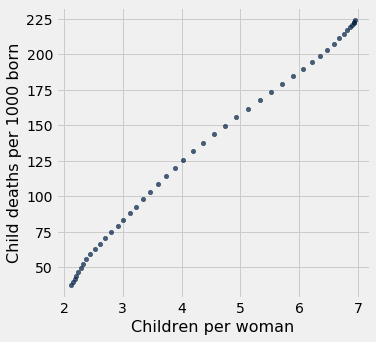

In [9]:
# Q 1.3
bgd_fertility = fertility_over_time('bgd', 1970)
bgd_child_mortality = child_mortality.where('geo', are.equal_to('bgd')).where(
    'time', are.above_or_equal_to(1970)).drop(0).relabel(0, 'Year').relabel(1, 'Child deaths per 1000 born')

post_1969_fertility_and_child_mortality = bgd_fertility.join('Year', bgd_child_mortality)
print(post_1969_fertility_and_child_mortality)
post_1969_fertility_and_child_mortality.scatter('Children per woman', 'Child deaths per 1000 born')

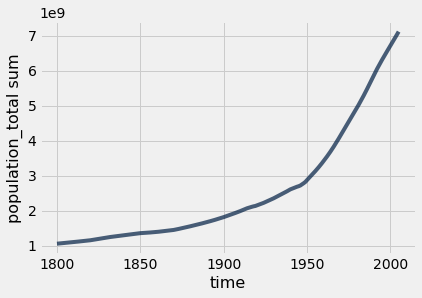

In [10]:
# patch, to avoid population_total int32 leading to overflow
x = np.array(population.column(2), dtype = 'int64')
population = population.drop(2).with_column('population_total', x)

population.where('time', are.between(1800, 2006)).drop('geo').group('time', sum).plot(0)

In [11]:
# Q 2.1

# We first create a population table that only includes the 
# 50 countries with the largest 2010 populations. We focus on 
# these 50 countries only so that plotting later will run faster.
big_50 = population.where('time', 2010).sort(2, descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))


# Create a function stats_for_year that takes a year and returns a table of statistics.
# The table it returns should have four columns:
#  geo, population_total, children_per_woman_total_fertility, and child_mortality_under_5_per_1000_born.
# Each row should contain one Alpha-3 country code and three statistics:
# population, fertility rate, and child mortality for that year from the population, fertility and child_mortality tables.
# Only include rows for which all three statistics are available for the country and year.
def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50.where('time', year).drop('time')
    f = fertility.where('time', year).drop('time')
    c = child_mortality.where('time', year).drop('time')
    return p.join('geo', f).join('geo', c)

stats_for_year(2015)

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
afg,32526562,4.47,91.1
arg,43416755,2.15,12.5
bgd,160995642,2.12,37.6
bra,207847528,1.78,13.3
can,35939927,1.68,4.9
chn,1376048943,1.57,10.7
cod,77266814,5.72,98.3
col,48228704,2.23,15.9
deu,80688545,1.44,3.7
dza,39666519,2.71,24


In [12]:
def pop_for_year(year):
    return sum(stats_for_year(year).column('population_total'))

pop_for_year(1960)

2624944597

In [13]:
np.arange(1960, 2011, 10)

array([1960, 1970, 1980, 1990, 2000, 2010])

In [14]:
# Q 2.2
decades = Table().with_column('decade', np.arange(1960, 2011, 10))
pop_by_decade = decades.with_column('population', decades.apply(pop_for_year, 'decade'))
pop_by_decade.set_format(1, NumberFormatter)
pop_by_decade


decade,population
1960,"2,624,944,597"
1970,"3,211,487,418"
1980,"3,880,722,003"
1990,"4,648,434,558"
2000,"5,367,553,063"
2010,"6,040,810,517"


In [15]:
countries = Table.read_table('../../data/countries.csv').where('country', are.contained_in(population.group('geo').column(0)))
countries.select('country', 'name', 'world_6region').row(0)

Row(country='afg', name='Afghanistan', world_6region='south_asia')

In [16]:
# Q 2.3

stats_for_year(1960).join('geo', countries, 'country').group('world_6region').relabel(0, 'region')

region,count
america,8
east_asia_pacific,10
europe_central_asia,10
middle_east_north_africa,7
south_asia,5
sub_saharan_africa,10


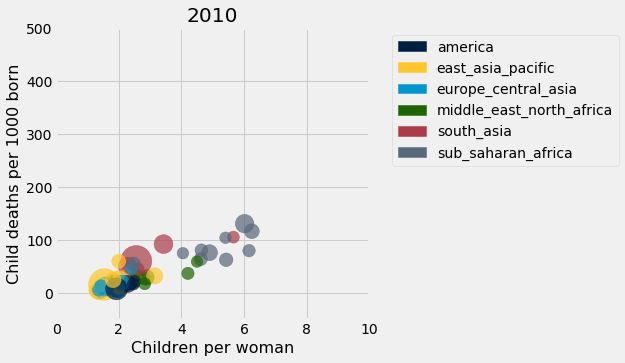

In [17]:
from functools import lru_cache as cache

@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabeled(2, 'Children per woman').relabeled(3, 'Child deaths per 1000 born')

def fertility_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, colors=4, s=500)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)

fertility_vs_child_mortality(2010)

In [18]:
import ipywidgets as widgets

for year in np.arange(1960, 2016):
    stats_relabeled(year)

_ = widgets.interact(fertility_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2015, value=1960))

interactive(children=(IntSlider(value=1960, description='year', max=2015, min=1960), Output()), _dom_classes=('widget-interact',))